<span style="color:#04c921; font-size:24px; font-weight:700"> Linear and Multiple Regression</span>

In this module, our aim is to better understand what makes linear regression tick. 
We'll begin with simple linear regression and make our way to multiple regression and, 
in the next notebook, we will get our feet wet with logistic regression.

<span style="color:#1d80ba; font-size:16px; font-weight:700"> Simple Linear Regression </span>

In simple linear regression, we want to predict the values of one variable based on the values of another variable. These are often denoted as `x` and `y`, where `x` is the variable that predicts `y`. 
These are also referred to as the independent (`x`) and dependent (`y`) variables. 
For example, it is probably reasonable to assume that the amount of time that an individual spends studying correlates to the grade that the individual obtains on an exam. 
In this case, the variable, "exam grade" is **dependent** on the variable "time spent studying".

  - `x = study time` 
  - `y = score on a test`

Now imagine we have some data that evaluates these two variables. 
Using the given information about how x and y are related, 
we can then create a linear model to predict future values of y for any particular values of x. 
In other words, we want to estimate y based on x. 


We can represent a simple linear regression line with the following equation, $y = \beta_0 + \beta_{1}x$, 
where $y$ is a point we are predicting given the estimated intercept ($\beta_0$) and slope ($\beta_1$) at a given point $x$. 
Following our example, given the amount of time someone studies ($x$), what would their expected grade on their exam ($y$) be? 
But how do we find the linear regression line that best approximates the linear relationship? 
**Minimization of the squared errors.**
In other words, we create a line that minimizes the squared distance from each point to the residual line.

We can make three simple assumptions for simple linear regression model: 

Given our linear equation, $y^i = \beta_0 + \beta_1.{x_1}^i + \epsilon^i$,&nbsp;&nbsp;&nbsp; where $ i = 1, 2, . . . ,n $
    
i) We assume that the relationship between x and y is linear

ii) There is an error associated with each $y_i$

iii) We lastly assume that the errors($\epsilon$) are independent and identically normally distributed with mean 0 and variance $\sigma^2$

We have data for `x` and `y` for observation `i` in the dataset. 
Using the equation above, we make the prediction $\beta_0 + \beta_1.x_1$. 
Since the coefficients $\beta_0$ and $\beta_1$ have to be same for all observations we often make some error which we call $\epsilon_i$(epsilon). 
These error terms are also called residuals. 
The error will be zero if all the points lie perfectly on a straight line, which rarely happens. 
So, every model has some error. 
The best model is the one with coefficients that has small error terms. 


student | study time | test score
--------|------------|-----------
$1$     | $x_1$      | $y_1$
$...$   | $...$      | $...$
$i$     | $x_i$      | $y_i$
$i + 1$ | $x_{i+1}$    | $y_{i+1}$
$...$   | $...$      | $...$
$n$ | $x_{n}$    | $y_{n}$

The above table is just an illustration of the mathematical notation presented above in tabular format using the example of student study time and student test scores.

We will try to understand residuals of data using cars data in datasets package...  

**Speed and stopping distance of cars:** 
The cars dataset in the datasets package has two variables: speed and dist. 
Take a quick look at some of the values in the data frame:

In [1]:
library(datasets)
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


The speed represents how fast the car was going (x) in miles per hour and dist (y) measures how far it took the car to stop, in feet.


Call:
lm(formula = cars$dist ~ cars$speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
cars$speed    3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


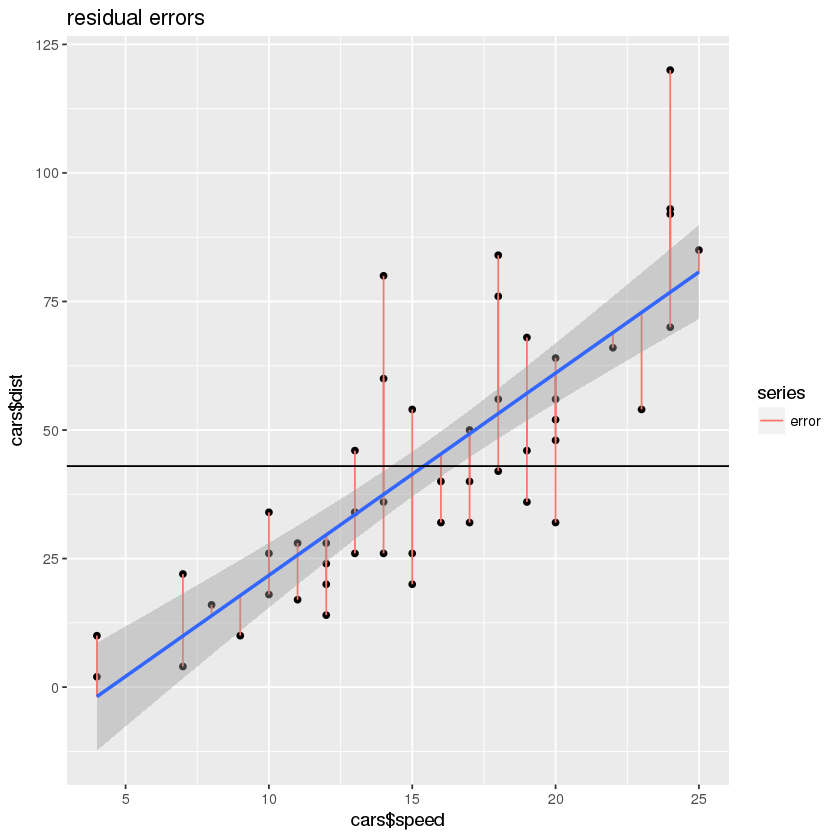

In [2]:
#A simple linear regression model
reg <- lm(cars$dist ~ cars$speed)

library(ggplot2)

# The predicted values for dependent variable 'dist' can be accessed by referring to fitted.values of the model as shown below.
pred_values<-reg$fitted.values

# Calculate the error terms, i.e. the difference between each point and the regression line. 
diff <- cars$dist-pred_values     

# Display the summary of the model
summary(reg)

#plot the regression line and residual errors
qplot(x=cars$speed, y=cars$dist)+
        geom_line(y=pred_values)+ # Draw the regression line with predicted values
        geom_segment(aes(x=cars$speed, xend=cars$speed, y=cars$dist, yend=pred_values, color="error"))+ # Draw residuals, lines 
                                                                    # from each point to the regression line.
        geom_smooth(method=lm,level = 0.95)+ # Add linear regression line, by default includes 95% confidence region
        geom_hline(aes(yintercept=mean(cars$dist)))+ # baseline model. line drawn at mean(dist).
       labs(title="residual errors", color="series")

How do we know how good our model is? 
Using `summary()` on the model we fitted will show the metrics measuring the quality of the model.

<span style="color:#1d80ba; font-size:16px; font-weight:700"> Observations from the model `reg` </span>

* **Residuals:** You saw what residuals are from the linear model we fit on car speed and dist variables, the difference between the actual values of the dependent variable (dist) and the predicted values from our regression `pred_values`. In our model, the lowest difference is `-29.07` and highest is 43.2. 


* **Significance stars: ** The stars indicate significance level. The number of asterisks displayed correspond to the p-value calculated for that variable. A variable is significant if its p value is less than 0.05, as you learned in module 2. $^{***}$(3 stars) for high significance  and $^*$(1 star) for low significance. In our model, speed has three stars indicating a strong relationship between speed and dist variables.


* **Estimated Coeffecient:** The estimated coefficient is the value of slope calculated by the regression. It calculates the slope of the line.


* **Standard Error of the Coefficient Estimate: ** It's the measure of the variability in the estimate for the coefficient. The lower this value the better it is and its value is relative to the value of the coefficient. As a rule of thumb, it is suggested to have this value at least an order of magnitude less than the coefficient estimate. In our model, the std error of the parent variable is 0.4155 against 3.9324 which is the estimate of the coefficient. So, it's significant.


* **t-value of the Coefficient Estimate: ** Score that measures whether or not the coefficient for this variable is meaningful for the model. We normally use p-value or stars(*) to test the variable significance.


* **Variable p-value: ** As explained above, this value should be as small as possible. 


* **Residual Std Error / Degrees of Freedom: ** The Residual Std Error is just the standard deviation of your residuals. For a normal distribution, the 1st and 3rd quantiles should be 1.5 +/- the std error. In our model, the first quantile Q1(-9.525) is a little over 1.5 standard deviations away from the standard error 15.38.


* **R-squared: ** It's the metric to measure the goodness of fit of the model. The higher the value the better the model is, with 1 being the highest. For our model, it is 0.6511 which is not bad.

<img src='../images/residuals.JPG'>

A simple scatterplot of the data is shown above. 
We have drawn two regression lines. 
The black line corresponds to regression line drawn using the average distance a car took to stop. 
It's the baseline model which gives largest residuals, i.e. differences between each point, with the black line. 
The baseline model has an intercept of 43.

The blue line corresponds to a regression line drawn using the model "dist ~ speed". 
If you take point A on the plot, its actual `y` value is somewhere around 82 but using our model we predict its value to be somewhere around 36. 
So, the residual for point A is 82-36=46, which is calculated as '$actual$ $value - predicted$ $value$'. 
The linear regression model we have fit has an intercept value of -17.5. 

<span style="color:#1d80ba; font-size:16px; font-weight:700"> Sum of the Squared Errors</span>

One of the measures of the quality of a regression line is the Sum of the Squared Errors (**SSE**), 
which is the sum of all the squared residuals or error terms.

Let's assume we have $n$ data points in our data. Then **SSE** is calculated as... 

$$SSE = {(\epsilon_1)^2 + (\epsilon_2)^2+......+ (\epsilon_n)^2}$$

In other words, $\epsilon_1$ is the residual of the first observation, $\epsilon_2$ is the residual of the second observation, 
and $\epsilon_n$ is the residual of the $n^{th}$ observation where $n$ is the number of observation in the data set.

The line which gives the minimal sum of all of these residuals is the best fit line.

<a id="R-squared"></a>


<span style="color:#1d80ba; font-size:16px; font-weight:700"> Other error measures:</span>

SSE can be difficult to interpret for two reasons:

    a) SSE depends on the number of data points. If you repeat an experiment with twice as much data the new SSE might be twice as big. The increase doesn't mean it's a bad model. 
    
    b) Sum of Squared Errors is in squared units of the dependent variable. 
    
To avoid the above issues, Root Mean Squared Error(**RMSE**) is often used. 

<span style="color:#c9702c; font-size:15px; font-weight:700"> Root Mean Squared Error</span>

RMSE divides SSE by N and takes the square root of the result. So, it is normalized by `N` and is in the same units as dependent variable. 

$$RMSE = {\sqrt{\dfrac{SSE}{N}}}$$

<span style="color:#c9702c; font-size:15px; font-weight:700"> R-Squared </span>


Another common error measure for Linear Regression is $R^2$. The $R^2$ is a better choice because it compares the best model with the baseline model. The baseline model is the one which doesn't use any variables. The black line above is the baseline model. It is the simple average of `y` values. The baseline model predicts the average value of the dependent variable regardless of the value of independent variable `x`.  

The Sum of Squared Errors for the baseline is called the Total Sum of Squares(**SST**). Let's calculate the SSE of our model and SST for our baseline model. 

Using the above values for SSE and SST we can calculate the $R^2$ value for the model. It is given as $R^2 = 1- {\dfrac{SSE}{SST}}$

                11353
        =  1 - -------
                32538
                
        =  0.65108
        
Compare this result with the summary of the model above. The $R^2$ values should match.



In [3]:
SST <- sum((cars$dist - mean(cars$dist))^2)
SST

# You can find the residuals of the regression model by referring to the residuals term of the model as shown below.
SSE = sum(reg$residuals^2)

# SSE is the sum of squares of all residuals which is calculated below
SSE

[1] 32538.98

[1] 11353.52

<span style="color:#1d80ba; font-size:16px; font-weight:700"> Partitioning the sum of squares</span>

When a regression is calculated for a variable, it divides the variation in the dependent variable Y into two parts: 
the variation of the predicted scores (Y') and the variation of the errors of prediction. 
The variation of Y (SSY) is the sum of the squared deviations of Y from the mean of Y. 
In the population, the formula is

SSY = $\sum (Y-\mu_{y})^2 $

where $\mu_y$ is the mean of Y. 


In the model above, the mean of Y (dist) is 42.98 and SSY is 32538.98. 
SSY is calculated in the cells below.

SSY can be partitioned into two parts: the sum of squares predicted (SSY_pred) and the sum of squares error (SSE). 
The sum of squares predicted (SSY_pred) is the sum of the squared deviations of the predicted scores 
subtracted from the mean predicted score. 
In the above model, it is 21185.4589489051, as calculated below (SSY_pred). 
The sum of squared error (SSE) is 11353.5210510949, as calculated below. This can be summed up as:

$$SSY = SSY\_pred + SSE$$


In [4]:
# Sum of squares of errors SST which is the total variation in Y(dist). SST is the same as SSY. 
SSY <- sum((cars$dist - mean(cars$dist))^2) 
SSY

[1] 32538.98

In [5]:
# Calculating the squares of difference between predicted values of the dist variable and the mean value of predictions.  
# Sum of squares of difference between dist and its mean is taken

SSY_pred = sum((mean(fitted(reg))-fitted(reg))^2) 

# SSY = SSY_pred + SSE should hold true as shown below.
paste("SSY: ", SSY)
paste("SSY_pred + SSE : ",SSY_pred + SSE)

[1] "SSY:  32538.98"

[1] "SSY_pred + SSE :  32538.98"

The SSY is the total variation, the SSY_pred is the variation explained, and the SSE is the variation unexplained. 
Therefore, the proportion of variation explained can be computed as:

$$Proportion\ explained = \frac{SSY\_pred}{SSY}$$

Similarly, the proportion not explained is:

$$Proportion\ not\ explained = \frac{SSE}{SSY}$$

There is an important relationship between the proportion of variation explained and Pearson's correlation: 
$R^2$ is the proportion of variation explained. 
Therefore, if r = 1, then, naturally, the proportion of variation explained is 1; 
if r = 0, then the proportion explained is 0.


$R^2$ is a better choice of error measure because it captures the value added from using a linear regression model over just predicting the average outcome for every data point. 

In $R^2 = 1- {\dfrac{SSE}{SSY}}$,  &nbsp;&nbsp;&nbsp;&nbsp;$0 \leq SSE \leq SSY$ and $0 \leq SSY$ 

Because **SSE** and **SSY** are sums they cannot be less than 0. 
A linear regression model will never be worse than a baseline model because if we replace the independent variable coefficient with 0 we will get a baseline model. 
So, in the worst case **SSE** will be equal to **SSY** and the $R^2$ will be 0. 
This means no improvement over the baseline model. 
In the best case, our model makes no errors and the **SSE** is equal to 0. So, the $R^2$ is equal to 1. 
When $R^2$ is 1, it means you have a perfect or almost perfect predictive model.

$R^2$ is better because it is unitless and universally interpretable. 
It is still sometimes hard to interpret $R^2$ because...

i) Good models for easy problems will have $R^2$ equal to 1

ii) Models for hard problems may have $R^2$ closer to 0

<span style="color:#1d80ba; font-size:16px; font-weight:700"> Standard Error of the Estimate</span>

The standard error of the estimate is a measure of the accuracy of predictions. 
We know the regression line is the line that minimizes the sum of squared deviations of a prediction (also called the sum of squares error). 
The standard error of the estimate is closely related to this quantity and is defined as below:

$\sigma_{est}$ = $\sqrt{\frac{\sum(Y-Y')^2}{N}}$

where $σ_{est}$ is the standard error of the estimate, Y is an actual score, 
Y' is a predicted score, and N is the number of pairs of scores. 
The numerator is the sum of squared differences between the actual scores and the predicted scores.

In [36]:
# Predicted values of dist using 'reg' regression model.
pred_values=as.vector(fitted(reg))

# The original values we try to predict
true_values=cars$dist

# The differenc, per element pair
diff_values=pred_values - true_values

#Squaring each term 
sqr_diff=diff_values * diff_values

# The summation
numerator = sum(sqr_diff)

# Final math, normalize
quot=numerator / nrow(cars)
paste("standard error of the estimate", sqrt(quot))

[1] "standard error of the estimate 15.0688559957914"

An alternative standard error of the model can be computed as the standard deviation of the predicted values.  
$\sigma_{est}$ = $\sqrt{\frac{\sum(Y'-\mu')^2}{N}}$

Standard error of residuals is:
$\sigma_{est}$ = $\sqrt{\frac{\sum(Y'-\mu')^2}{N-2}}$



In [37]:
# Predicted values of dist using 'reg' regression model.
pred_values=as.vector(fitted(reg))

# Mean of the predicted values.
pred_values_mean = mean(fitted(reg))

# Calculate the differences between predicted dist values and the mean of predicted values.
pred_values=pred_values_mean-pred_values

# # Sum of squares of difference between dist and its mean is taken
pred_values_squares_sum = sum(pred_values^2)

# Calculate Standard error of the estimate based on above formula.
standard_error_estimate = sqrt(pred_values_squares_sum/(nrow(cars))) 
paste("standard error of the estimate", standard_error_estimate)

[1] "standard error of the estimate 20.5841973119697"

<span style="color:#1d80ba; font-size:15px; font-weight:700">Confidence intervals for slope</span>

When plotting the regression line to predict wine price, you can shade a region on both sides of regression line. 
The geom_smooth(method=lm) command adds a linear regression line and includes a 95% confidence region by default. 
If you want to play with confidence level add the parameter `level`. 
Below is an example worked out to show the same regression line with different confidence intervals. 
You can observe that as the confidence region is increased, 
the more observations are included in the shaded region... but the accuracy of the model also decreases. 

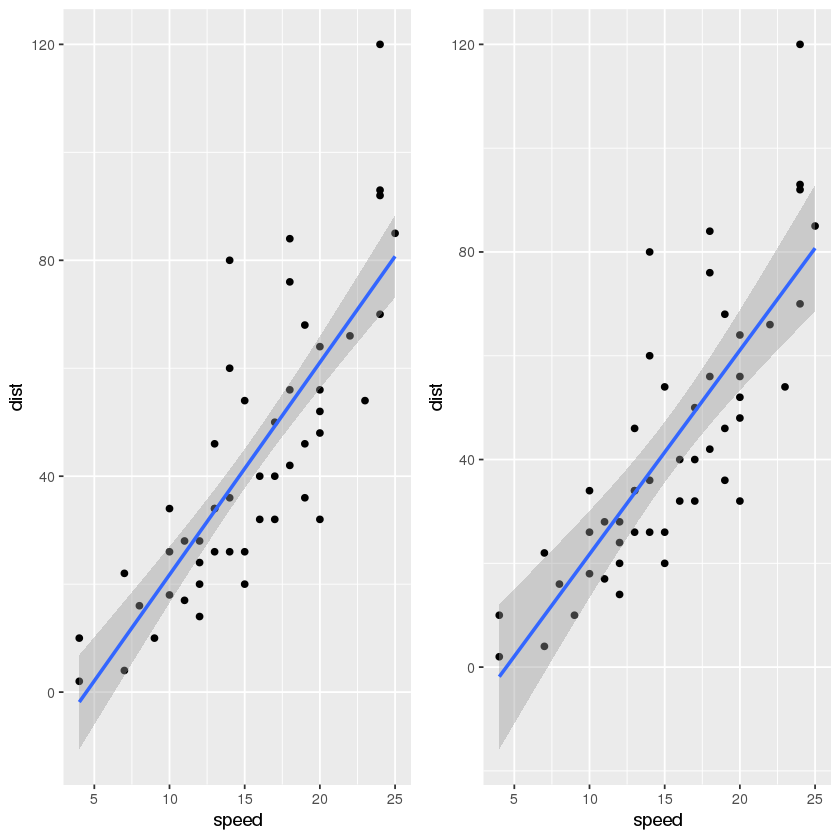

In [7]:
library(gridExtra)

grid.arrange(
    ggplot(cars, aes(x=speed, y=dist)) +
    geom_point() +   
    geom_smooth(method=lm,level = 0.90),   # Add linear regression line, includes 90% confidence region
    
    ggplot(cars, aes(x=speed, y=dist)) +
    geom_point() +   
    geom_smooth(method=lm,level = 0.99),   # Add linear regression line, includes 99% confidence region
nrow=1,ncol=2)

In [8]:
#confint() computes confidence intervals for one or more parameters in the fitted model. 
#For 
confint(reg, level=0.95)

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
cars$speed,3.096964,4.767853


<span style="color:#1d80ba; font-size:16px; font-weight:700"> Residual Analysis</span>

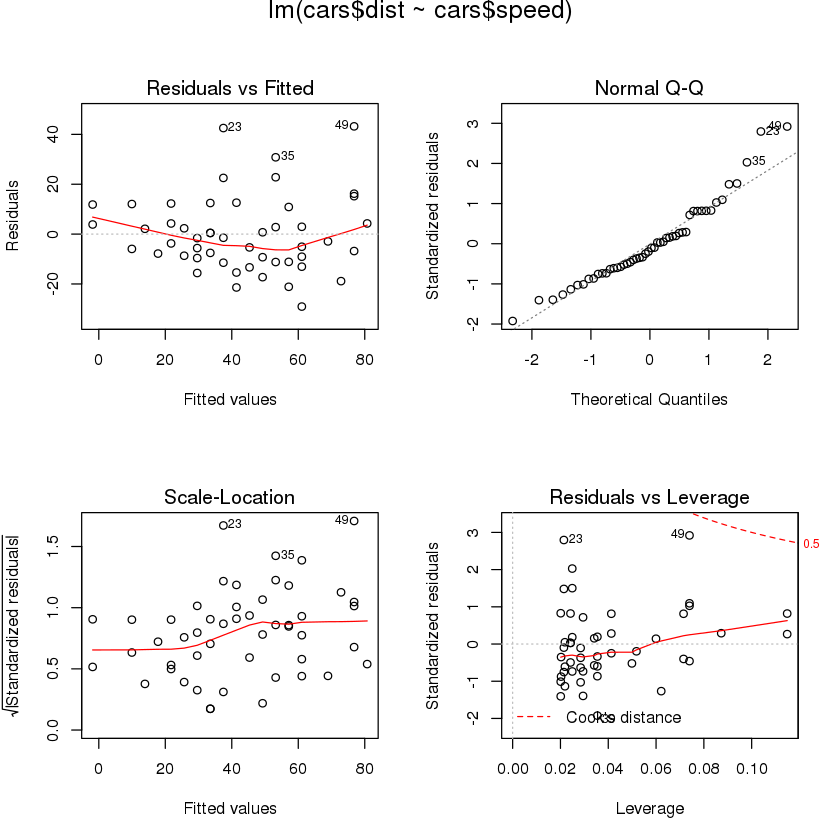

In [9]:
par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(reg)

<span style="color:#c9702c; font-size:15px; font-weight:700"> Testing the Normality Assumption</span>

**Normal Q-Q plot:** 
The Normal Q-Q plot helps to check the normality of the residuals graphically. 
From the normal Q-Q plot above, 
we see that the distribution of the residuals are not aligned with the straight dotted line. 
If the assumption of normality were true, 
then the points will be randomly scattered about the dotted straight line. 
But here we see a slight departure from normality in that the dots show systematic clustering on one side of the line.
We would say there is some evidence that the residuals are not perfectly normal. 
Look out for any curvature or substantial departures from the straight line.


There are many statistical tests of normality.
Here we will use the Shapiro-Wilk test.

We perform the Shapiro-Wilk test, using the shapiro.test function from the stats package. 
The hypotheses are
    
$H_0$ : the residuals are normally distributed
                
                versus
    
$H_1$ : the residuals are not normally distributed.

The results are below using R...

In [10]:
shapiro.test(residuals(reg))


	Shapiro-Wilk normality test

data:  residuals(reg)
W = 0.94509, p-value = 0.02152


For these data the assumption of normality of the residuals would be rejected at the $\alpha$ = 0.05 significance level, 
but the regression model is reasonably robust to deviations from the normality assumption. 
As long as the residual distribution is not highly skewed, the regression estimators will perform reasonably well.

----

##### Constant Variance Assumption
**Scale-Location: ** 
The Scale-Location plot helps to determine if the spread of the residuals changes over time (or index). 
Residuals do not have constant variance so it's difficult to determine. 
In order to check the constant variance assumption we must standardize the residuals before plotting. 

We estimate the standard error of $E_i$ with $s_{E_i} = s\sqrt{(1-h_{ii})}$ and define the standardized residuals $R_i, i = 1,2,..,n$

$$R_i = \frac{E_i}{s\sqrt{(1-h_{ii})}}$$

As we look at a scatterplot of $\sqrt{|R_i|}$ versus $\hat{Y}_i$ we would expect under the regression assumptions to 
see a constant band of observations, indicating no change in the magnitude of the observed distance from the line. 
We want to watch out for a fanning-out of the residuals, or a less common funneling-in of the residuals. 
Both patterns indicate a change in the residual variance and a consequent departure 
from the regression assumptions, the first an increase and the second a decrease. 



For these data the residuals are slightly fanning-out.

#### Testing the Constant Variance Assumption

We will use the Breusch-Pagan (BP) test to decide whether the variance of the residuals is non-constant. 
The null hypothesis is that the variance is the same for all observations and the 
alternative hypothesis is that the variance is not the same for all observations. 

We reject the null hypothesis if BP is too large, 
which happens when the explained variation in the new model is large relative to the unexplained variation in the original model. 
We do it in R with the bptest function from the `lmtest` package.

In [11]:
library(lmtest)
bptest(reg)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  reg
BP = 3.2149, df = 1, p-value = 0.07297


For these data we would not reject the null hypothesis at the $\alpha$ = 0.05 level. 
There is relatively weak evidence against the assumption of constant variance.

##### Independence Assumption

**Residuals vs Fitted:** 

One of the strongest of the regression assumptions is the one regarding independence. 
Departures from the independence assumption are often exhibited by correlation 
(or autocorrelation, literally, self-correlation) present in the residuals. 
There can be positive or negative correlation. 

Positive correlation is displayed by positive residuals followed by positive residuals, 
and negative residuals followed by negative residuals. 
Looking from left to right, this is exhibited by a cyclical feature in the residual plots, 
with long sequences of positive residuals being followed by long sequences of negative ones.

On the other hand, negative correlation implies positive residuals followed by negative residuals, 
which are then followed by positive residuals, etc. 
Consequently, negatively correlated residuals are often associated with an alternating pattern in the residual plots. 
There is no obvious cyclical wave pattern or structure to the residual plot we have above. 

**Testing the Independence Assumption**: 
Statistically to test whether there is evidence of autocorrelation in the residuals or not can be done with the Durbin-Watson test. 
It is performed with the `dwtest` function from the `lmtest` package. 
We will conduct a two sided test that the correlation is not zero, 
which is not the default (the default is to test that the autocorrelation is positive).

In [12]:
library(lmtest)
dwtest(reg, alternative = "two.sided")


	Durbin-Watson test

data:  reg
DW = 1.6762, p-value = 0.1904
alternative hypothesis: true autocorrelation is not 0


In this case we do not reject the null hypothesis at the $\alpha$ = 0.05 significance level, 
since there is very little evidence of nonzero autocorrelation in the residuals.

<span style="color:#1d80ba; font-size:15px; font-weight:700"> Analyzing observations</span>

There are two types of observations with which we must be especially careful:
1. Influential observations are those that have a substantial effect on our estimates, predictions, or inferences. A small change in an influential observation is followed by a large change in the parameter estimates or inferences.

2. Outlying observations are those that fall fall far from the rest of the data. They may be indicating a lack of fit for our regression model, or they may just be a mistake or typographical error that should be corrected. Regardless, special attention should be given to these observations. An outlying observation may or may not be influential.


#### Outliers

There are three ways that an observation (xi; yi) may be an outlier: 
it can have an xi value which falls far from the other x values, 
it can have a yi value which falls far from the other y values, 
or it can have both its xi and yi values falling far from the other x and y values.

** Leverage:**
Leverage statistics are designed to identify observations which have x values that are far away from the rest of the data. 
In the simple linear regression model the leverage of xi is denoted by hii and defined by

$$h_{ii} = \frac{1}{n}+\frac{(x_i - \bar{x})^2}{\sum_{k=1}^{n} (x_k - \bar{x})^2}, \quad i=1,2,3,...,n $$

if the distance from $x_i$ to x is large relative to the other x’s then $h_{ii}$ will be close to 1. 
Leverages satisfies $0 \le h_{ii} \le 1$

A rule of thumb is to consider leverage values to be large if they are more than double their average size (which is 2=n). 
So, leverages larger than 4=n are suspect. 
Another rule of thumb is to say that values bigger than 0.5 indicate high leverage, 
while values between 0.3 and 0.5 indicate moderate leverage.

**Standardized and Studentized Deleted Residuals: **
We have already seen standardized residuals $r_i$ under the Constant Variance Assumption above. 
They are merely residuals that have been divided by their respective standard deviations.

$$R_i = \frac{E_i}{s\sqrt{(1-h_{ii})}}, \quad i=1,2,3,...,n $$

Values of $|R_i| > 2$ are extreme and suggest that the observation has an outlying y-value.
Now delete the $i_{th}$ case and fit the regression function to the remaining n - 1 cases, 
producing a fitted value $\hat{Y_{(i)}}$ with deleted residual 
$$D_i = Y_i - \hat{Y_{(i)}}$$

so that the studentized deleted residuals $t_i$ is defined by

$$t_i = \frac{D_i}{S_{(i)}/(1-h_{ii})}, \quad i=1,2,...,n$$

We can calculate the standardized residuals with the rstandard function. 
The input is the `lm` object, which is reg.

In [13]:
sres <- rstandard(reg)
sres[1:5]

1          2          3          4          5 
 0.2660415  0.8189327 -0.4013462  0.8132663  0.1421624

We can find out which observations have standardized residuals larger than two with the command below...

In [14]:
sres[which(abs(sres) > 2)]

23       35       49 
2.795166 2.027818 2.919060

In this case, we see that observations 23, 35, and 49 are potential outliers with respect to their y-value. 
We can compute the studentized deleted residuals with rstudent:

In [15]:
sdelres <- rstudent(reg)
sdelres[1:5]

1          2          3          4          5 
 0.2634500  0.8160784 -0.3978115  0.8103526  0.1407033

We should compare these values with critical values from a `t` (df = n - 3) distribution, 
which in this case is `t` (df = 50 - 3 = 47). 
We can calculate a 0.005 quantile and check with...

In [16]:
t0.005 <- qt(0.005, df = 47, lower.tail = FALSE)
sdelres[which(abs(sdelres) > t0.005)]

23       49 
3.022829 3.184993

This means that observations 23 and 49 have a large studentized deleted residuals. 
The leverages can be found with the hatvalues function:

In [17]:
leverage <- hatvalues(reg)
leverage[1:5]

1          2          3          4          5 
0.11486131 0.11486131 0.07150365 0.07150365 0.05997080

In [18]:
leverage[which(leverage > 4/50)]

1          2         50 
0.11486131 0.11486131 0.08727007

We see that observations 1, 2, and 50 have leverages bigger than double their mean value. 
These observations would be considered outlying with respect to their x value (although they may or may not be influential).

#### Influential Observations

It is always a concern when a single observation plays too large a role in the regression model. 
Hence, it becomes desirable to check to see how much our estimates and predictions would change if one of the observations were not included in the analysis.
If an observation changes the estimates/predictions a large amount, 
then the observation is influential and should be subjected to a higher level of scrutiny.

We measure the change in the parameter estimates as a result of deleting an observation with DFBETAS.

The signs of the DFBETAS indicate whether the coeffcients would increase or decrease as a result of including the observation. 
If the DFBETAS are large, then the observation has a large impact on those regression coeffcients. 
We label observations as suspicious if their DFBETAS have magnitude greater 1 for small data or $2/ \sqrt{n}$ for large data sets.

We can calculate the DFBETAS with the dfbetas function...

In [19]:
dfb <- dfbetas(reg)
head(dfb)

,(Intercept),cars$speed
1,0.09440188,-0.08624563
2,0.29242487,-0.26715961
3,-0.10749794,0.09369281
4,0.21897614,-0.19085472
5,0.03407516,-0.02901384
6,-0.11100703,0.09174024


We see that the inclusion of the first observation slightly increases the intercept and slightly decreases the coeffcient on speed. 
We can measure the influence that an observation has on its fitted value with DFFITS...

In [20]:
dff <- dffits(reg)
dff[1:5]

1           2           3           4           5 
 0.09490289  0.29397684 -0.11039550  0.22487854  0.03553887

A rule of thumb is to flag observations whose DFFITS exceeds one in absolute value, but there are none of those in this data set.
Read more about the function (and related functions) after loading help below.

In [21]:
help(dffits)

**Cook’s Distance: **

The DFFITS are good for measuring the influence of a single fitted value but we may want to measure the influence an observation has on all of the fitted values simultaneously. 
Cook's distance is used to measure this statistic. 
To assess the significance of Cook's D, we compare to quantiles of an f (df1 = 2, df2 = n - 2) distribution. 
A rule of thumb is to classify observations falling higher than the 50th percentile as being extreme.

As a common rule of thumb an observation with a value of Cook's D over 1.0 has too much influence. 

We can display the observations that have relatively large values of Cook's D. 
A conventional cut-off point is 4/n, where n is the number of observations in the data set. 
We will use this criterion to select the values to display.

1            2            3            4            5 
0.0045923121 0.0435139907 0.0062023503 0.0254673384 0.0006446705

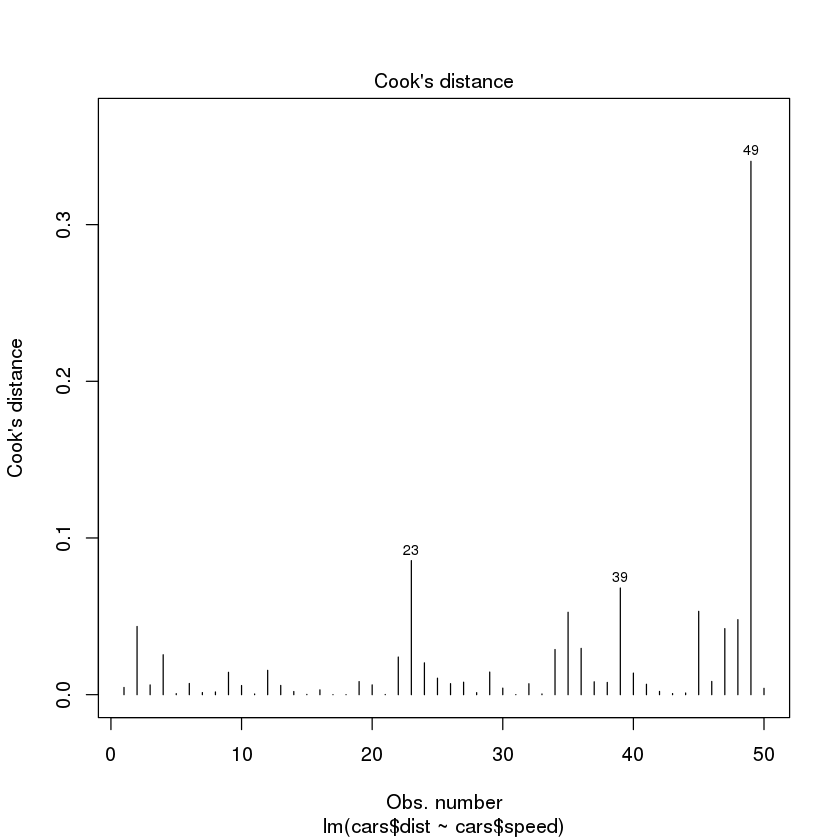

In [22]:
cooksD <- cooks.distance(reg)
cooksD[1:5]
plot(reg, which=4)

Observations with the largest Cook’s D values are labeled, 
hence we see that observations 23, 39, and 49 are suspicious. 
However, we need to compare this to the quantiles of an f (df1 = 2; df2 = 48) distribution:

In [23]:
F0.50 <- qf(0.1, df1 = 2, df2 = 48)
cooksD[which(cooksD > F0.50)]

49 
0.3403959

We see that there is one observation with an extreme Cook’s distance. 
After scrutiny we can either include or discard it from dataset.

----
Let's work with wine price dataset for multiple regression... 

In [24]:
wine_data <- read.csv('/dsa/data/all_datasets/wine price/wine.csv')
head(wine_data)

Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
1952,7.4950,600,17.1167,160,31,43183.57
1953,8.0393,690,16.7333,80,30,43495.03
1955,7.6858,502,17.1500,130,28,44217.86
1957,6.9845,420,16.1333,110,26,45152.25
1958,6.7772,582,16.4167,187,25,45653.81
1959,8.0757,485,17.4833,187,24,46128.64


<span style="color:#1d80ba; font-size:18px; font-weight:700"> Multiple Regression</span>

The multiple regression model is similar to one variable regression model but has a coefficient term for each independent variable `x`.  
Mathematically, it can be represented as 

$$
y^i = \beta_0 + \beta_1.{x_1}^i + \beta_2.{x_2}^i + ... + \beta_k.{x_k}^i +\epsilon^i, \quad i = 1, 2, . . . , n.
$$ 

We predict the dependent variable `y` using independent variables ${x_1}$, ${x_2}$, 
through ${x_k}$ and so on. `K` here represents the number of independent variables in the model. 

$\beta_0$ is the coefficient for intercept term and $\beta_1$ through $\beta_k$ are coefficients for independent variables. 
`i` is used to denote a particular observation in the dataset. 
The best model is selected, the same as it was above. We will minimize the Squared errors (**SSE**), 
using error terms $\epsilon^i$.   

----
Let's continue working with the wine price dataset to fit a multiple regression model for predicting wine price. 
Let's try to fit single variable regression models using each independent variable to predict wine price. 
Fitting simple linear regression models using all the independent variables gave $R^2$ values as listed below.


variable | $R^2$
---------|-------
Year     | 0.20 
WinterRain|0.02
AGST|0.44
HarvestRain|0.32
Age|0.20
FrancePop|0.22

Based on the above table, we see that Average Growing Season Temparature (`AGST`) has an $R^2$ value of 0.44. 
We will build our multiple regression model using `AGST` and keep adding variables one by one. 

In [25]:
multi_reg1 <- lm(Price ~ AGST, data=wine_data)
summary(multi_reg1)


Call:
lm(formula = Price ~ AGST, data = wine_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78450 -0.23882 -0.03727  0.38992  0.90318 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.4178     2.4935  -1.371 0.183710    
AGST          0.6351     0.1509   4.208 0.000335 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4993 on 23 degrees of freedom
Multiple R-squared:  0.435,	Adjusted R-squared:  0.4105 
F-statistic: 17.71 on 1 and 23 DF,  p-value: 0.000335


According to the table above, `HarvestRain` is the one with next highest $R^2$ value. So, we will include HarvestRain in our model. 

In [26]:
multi_reg2 <- lm(Price ~ AGST + HarvestRain, data=wine_data)
summary(multi_reg2)


Call:
lm(formula = Price ~ AGST + HarvestRain, data = wine_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88321 -0.19600  0.06178  0.15379  0.59722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.20265    1.85443  -1.188 0.247585    
AGST         0.60262    0.11128   5.415 1.94e-05 ***
HarvestRain -0.00457    0.00101  -4.525 0.000167 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3674 on 22 degrees of freedom
Multiple R-squared:  0.7074,	Adjusted R-squared:  0.6808 
F-statistic: 26.59 on 2 and 22 DF,  p-value: 1.347e-06


There is a significant increase in $R^2$ value after adding the `HarvestRain` model. 
The `HarvestRain` model is able to explain 70% of the variation in the data. 
The adjusted R-squared value has increased from 0.4105 to 0.6808. 
Keep an eye on the adjusted R-squared value, as we will examine it closely soon.
Finally, we will add FrancePop as our third predictor of our new model.

In [27]:
multi_reg3 <- lm(Price ~ AGST + HarvestRain + FrancePop, data=wine_data)
summary(multi_reg3)


Call:
lm(formula = Price ~ AGST + HarvestRain + FrancePop, data = wine_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64352 -0.21716 -0.02674  0.28963  0.47593 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.709e+00  2.073e+00   0.824  0.41898    
AGST         5.273e-01  9.906e-02   5.323 2.80e-05 ***
HarvestRain -4.505e-03  8.690e-04  -5.184 3.89e-05 ***
FrancePop   -5.388e-05  1.823e-05  -2.956  0.00755 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3161 on 21 degrees of freedom
Multiple R-squared:  0.7933,	Adjusted R-squared:  0.7638 
F-statistic: 26.87 on 3 and 21 DF,  p-value: 2.203e-07


Again there is a good improvement in $R^2$ value from 0.70 to 0.79. 
``FrancePop` is able to explain variation in the data that `AGST` and `HarvestRain` couldn't. 
Adjusted R-squared value has increased from 0.6808 to 0.7638. 
Add `Year` as our fourth predictor of our new model.

In [28]:
multi_reg4 <- lm(Price ~ AGST + HarvestRain + FrancePop + Year, data=wine_data)
summary(multi_reg4)


Call:
lm(formula = Price ~ AGST + HarvestRain + FrancePop + Year, data = wine_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62758 -0.20490 -0.00805  0.25134  0.45770 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.521e+01  1.539e+02  -0.359    0.724    
AGST         5.235e-01  1.017e-01   5.149 4.89e-05 ***
HarvestRain -4.465e-03  8.938e-04  -4.996 6.94e-05 ***
FrancePop   -1.180e-04  1.742e-04  -0.677    0.506    
Year         3.060e-02  8.273e-02   0.370    0.715    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3228 on 20 degrees of freedom
Multiple R-squared:  0.7947,	Adjusted R-squared:  0.7537 
F-statistic: 19.36 on 4 and 20 DF,  p-value: 1.188e-06


There is barely any increase in the $R^2$ value from 0.7933 to 0.7947. 
Year did not contribute anything to the model. 
The adjusted R-squared value has decreased from 0.7638 to 0.7537.
So, when you keep adding predictors to the model that don't contribute much, 
there is a penalty on the model in the form of Adjusted R-squared. 
If you keep adding more variables there won't be a significant improvement in $R^2$ value but 
Adjusted R-squared value keeps decreasing which suggests there is no use in adding the variables to the model.



# Save your notebook!